In [1]:
import psycopg2
import config as creds
import sqlalchemy
from sqlalchemy import create_engine
import numpy as np
from numpy.random import randn
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
user=creds.PGUSER
password=creds.PGPASSWORD
host=creds.PGHOST
port=5432
database=creds.PGDATABASE

In [3]:
engine_str=f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}"

In [4]:
engine = create_engine(engine_str)

In [5]:
#conn = engine.connect()
conn = engine.raw_connection()
print('Connected')

Connected


In [6]:
cur = conn.cursor()
print('Cursor created')

Cursor created


In [7]:
query1='''
SELECT *
FROM buildings_data b
LEFT OUTER join noaa_data n
ON b.REPORTINGYEAR = n.WEATHERYEAR
WHERE b.MONTH = n.MONTH;
'''

In [8]:
df1=pd.read_sql(query1,conn)

In [9]:
pd.set_option('display.max_columns',None)

In [10]:
df1.head()

,id,pid,dcrealpropertyid,ward,postalcode,yearbuilt,reportingyear,reportstatus,primarypropertytype_selfselect,taxrecordfloorarea,reportedbuildinggrossfloorarea,energystarscore,month,kbtu,elegas,id,date,awnd,cldd,htdd,snow,tavg,tmax,tmin,wdf2,wdf5,wsf2,wsf5,weatheryear,month
0,0,PM4373175,0171_0814,2,20006,1893,2016,In Compliance,2,137024.0,176170.0,0.0,1,0.0,N,72,2016-01,9.4,0.0,930.0,18.8,35.0,42.6,27.4,330.0,280.0,36.0,44.0,2016,1
1,3,PM1331555,0248_0812,2,20005,1921,2016,In Compliance,7,146425.0,222000.0,52.0,1,0.0,N,72,2016-01,9.4,0.0,930.0,18.8,35.0,42.6,27.4,330.0,280.0,36.0,44.0,2016,1
2,4,PM3299991,0139_0817,2,20036,1963,2016,In Compliance,10,101337.0,73168.0,38.0,1,0.0,N,72,2016-01,9.4,0.0,930.0,18.8,35.0,42.6,27.4,330.0,280.0,36.0,44.0,2016,1
3,5,PM4357992,0494_0860,6,20024,1968,2016,In Compliance,10,80612.0,60000.0,87.0,1,0.0,N,72,2016-01,9.4,0.0,930.0,18.8,35.0,42.6,27.4,330.0,280.0,36.0,44.0,2016,1
4,6,PM3632510,0182_0083,2,20036,2001,2016,In Compliance,2,184556.0,158819.0,49.0,1,0.0,N,72,2016-01,9.4,0.0,930.0,18.8,35.0,42.6,27.4,330.0,280.0,36.0,44.0,2016,1


In [11]:
query2='''SELECT b.PID, b.kbtu,b.reportedbuildinggrossfloorarea, b.ward, b.primarypropertytype_selfselect, b. energystarscore, b.elegas, n.awnd,
       n.cldd, n.htdd, n.tavg, n.wdf2, n.wdf5, n.wsf2,n.wsf5, n.date 
FROM buildings_data b
LEFT OUTER join noaa_data n
ON b.REPORTINGYEAR = n.WEATHERYEAR
WHERE b.MONTH = n.MONTH
AND b.KBTU > 0
AND b. reportedbuildinggrossfloorarea > 50000
AND b. reportingyear=2019;
'''

In [12]:
df2=pd.read_sql(query2, conn)

In [13]:
df2['kbtusqft']=df2['kbtu']/df2['reportedbuildinggrossfloorarea']

In [14]:
df2.head()

,pid,kbtu,reportedbuildinggrossfloorarea,ward,primarypropertytype_selfselect,energystarscore,elegas,awnd,cldd,htdd,tavg,wdf2,wdf5,wsf2,wsf5,date,kbtusqft
0,PM6211783,104735.6,62306.0,0,7,19.0,N,9.6,0.0,860.0,37.2,320.0,310.0,36.0,46.0,2019-01,1.680987
1,PM4218474,811768.2,59931.0,0,7,57.0,N,9.6,0.0,860.0,37.2,320.0,310.0,36.0,46.0,2019-01,13.545047
2,PM3353545,1961400.1,326513.0,6,10,54.0,N,9.6,0.0,860.0,37.2,320.0,310.0,36.0,46.0,2019-01,6.007112
3,PM3994488,345569.0,50200.0,2,11,0.0,N,9.6,0.0,860.0,37.2,320.0,310.0,36.0,46.0,2019-01,6.883845
4,PM4005952,27342.9,337838.0,6,7,90.0,N,9.6,0.0,860.0,37.2,320.0,310.0,36.0,46.0,2019-01,0.080935


In [15]:
df2.describe()

,kbtu,reportedbuildinggrossfloorarea,ward,energystarscore,awnd,cldd,htdd,tavg,wdf2,wdf5,wsf2,wsf5,kbtusqft
count,3.351000e+04,3.351000e+04,33510.000000,33510.000000,33510.000000,33510.000000,33510.000000,33510.000000,33510.000000,33510.000000,33510.000000,33510.000000,33510.000000
mean,7.408985e+05,2.114622e+05,3.479290,53.812056,8.514166,166.469173,302.443748,60.422214,254.077887,301.697404,35.195270,48.612534,3.229806
std,2.208882e+06,3.009452e+05,2.081705,31.477448,0.866888,192.304315,321.677736,16.038403,110.898336,44.693141,5.481149,8.877928,3.631543
min,1.000000e+00,5.001800e+04,0.000000,0.000000,7.200000,0.000000,0.000000,37.200000,10.000000,200.000000,25.900000,32.000000,0.000006
25%,1.310463e+05,7.832200e+04,2.000000,29.000000,7.800000,0.000000,0.000000,42.200000,250.000000,290.000000,31.100000,44.000000,1.197564
50%,3.386742e+05,1.323280e+05,2.000000,61.000000,8.500000,53.000000,133.000000,62.300000,310.000000,320.000000,36.000000,46.000000,2.684523
75%,7.745515e+05,2.441600e+05,6.000000,80.000000,9.200000,340.000000,637.000000,76.300000,320.000000,330.000000,38.900000,55.000000,4.454279
max,6.672808e+07,5.754738e+06,8.000000,100.000000,10.100000,529.000000,860.000000,82.100000,350.000000,350.000000,45.000000,68.000000,319.756434


(0.0, 6.0)

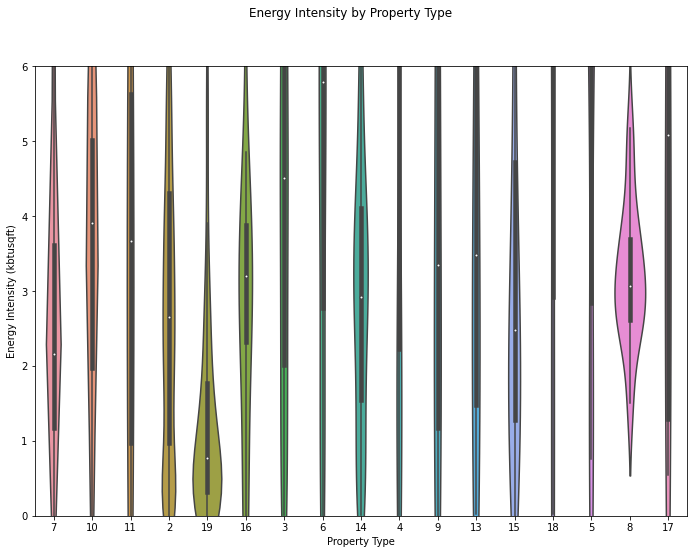

In [16]:
a4_dims = (11.7, 8.27)   
fig, ax = plt.subplots(figsize=a4_dims)
sns.violinplot(x="primarypropertytype_selfselect",y="kbtusqft", data=df2)
fig.suptitle('Energy Intensity by Property Type')
ax.set_xlabel('Property Type')
ax.set_ylabel('Energy Intensity (kbtusqft)')
ax.set_ylim(0,6)



(0.0, 6.0)

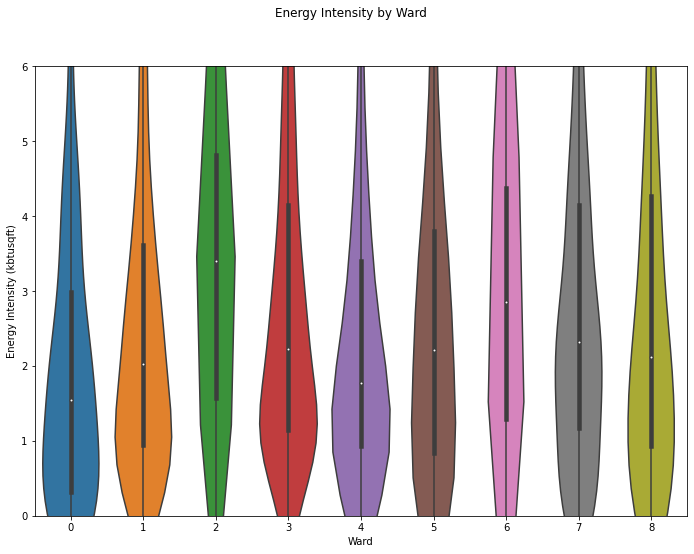

In [17]:
a4_dims = (11.7, 8.27)   
fig, ax = plt.subplots(figsize=a4_dims)
sns.violinplot(x="ward",y="kbtusqft", data=df2)
fig.suptitle('Energy Intensity by Ward')
ax.set_xlabel('Ward')
ax.set_ylabel('Energy Intensity (kbtusqft)')
ax.set_ylim(0,6)

(0.0, 18500.0)

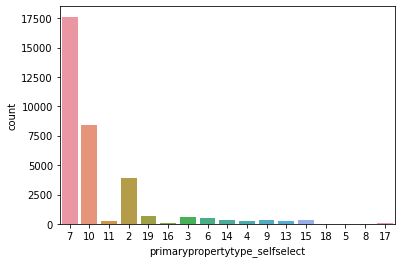

In [18]:
ax=sns.countplot(x='primarypropertytype_selfselect',data=df2,) 
ax.set_ylim(0,18500)

(0.0, 2000.0)

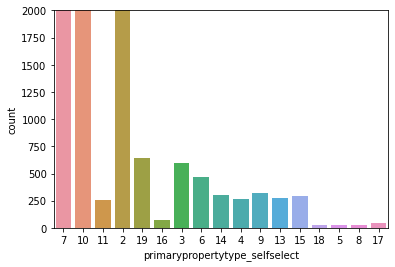

In [25]:
ax=sns.countplot(x='primarypropertytype_selfselect',data=df2,) 
ax.set_ylim(0,2000)

(0.0, 18500.0)

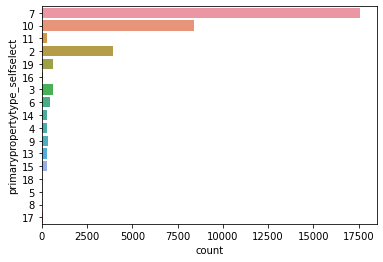

In [26]:
ax=sns.countplot(y='primarypropertytype_selfselect',data=df2,) 
ax.set_xlim(0,18500)

(0.0, 15.0, 0.0, 5000.0)

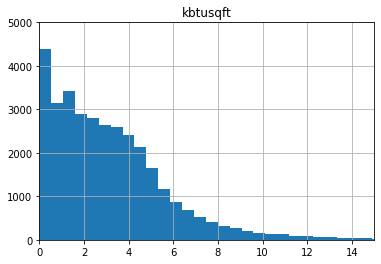

In [20]:
df2.hist(column="kbtusqft",bins=600)

#plt.hist(x="kbtusqft", bins=30, data=df2,facecolor='green', alpha=0.75)


#plt.xlabel('Smarts')
#plt.ylabel('Probability')
#plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')

plt.axis(xmin=0,xmax=15,ymin=0,ymax=5000)
#plt.grid(True)


#plt.show()
#ax = sns.displot(x= "kbtusqft", data=df2,)



(0.0, 1000000.0, 0.0, 5000.0)

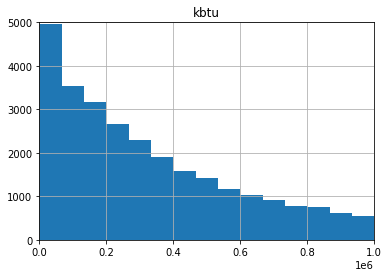

In [21]:
df2.hist(column ="kbtu",bins=1000)
plt.axis(xmin=0,xmax=1000000,ymin=0,ymax=5000)


In [22]:
conn.close()
print('Closed')

Closed
